In [14]:
%matplotlib inline
import os
import datetime as dt
import numpy as np
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from scipy import interpolate, stats
from matplotlib import pyplot as plt, colorbar
import pysolid
from mintpy.utils import ptime, readfile, writefile
from tools.simulation import iono
from tools import iono_tec
plt.rcParams.update({'font.size': 12})
Re = 6378122.65 #m

proj_dir = os.path.expanduser('~/Papers/2021_Geolocation/figs_src')
work_dir = os.path.join(proj_dir, 'SET')
os.chdir(work_dir)
print('Go to directory:', work_dir)

# aux info
tf_file = os.path.join(proj_dir, 'data/NISAR_track_frames/tframe_left_look.gpkg')
tf_out_file = os.path.join(work_dir, '../TEC_stats/tframe_left_look.gpkg')

Go to directory: /Users/yunjunz/Papers/2021_Geolocation/figs_src/SET


In [15]:
tfs = gpd.read_file(tf_out_file)
tfs.crs = "EPSG:4326"

flagA = tfs.passDirection.isin(['Ascending'])
flagD = tfs.passDirection.isin(['Descending'])
indA = np.where(flagA)[0][1]
indD = np.where(flagD)[0][1]

/Users/yunjunz/tools/miniconda3/envs/insar/lib/python3.7/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


lat/lon: 0.902939113257155/-103.42721892088015
PYSOLID: calculate solid Earth tides in east/north/up direction
PYSOLID: lot/lon: 0.902939113257155/-103.42721892088015 degree
PYSOLID: start UTC: 2022-01-01T00:33:51
PYSOLID: end   UTC: 2023-01-01T00:33:51
PYSOLID: time step: 600 seconds


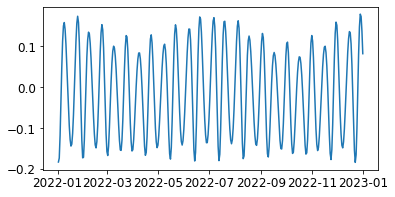

In [37]:
indA = np.where(flagA)[0][1]
tf = tfs.iloc[indA]
lat = tf.groundLat
lon = tf.groundLon
print('lat/lon: {}/{}'.format(lat, lon))
dt0 = dt.datetime(2000,1,1) + dt.timedelta(seconds=int((tf.startET + tf.endET)/2.0))
dt1 = dt0 + dt.timedelta(days=365)

# run
(dt_out,
 tide_e,
 tide_n,
 tide_u) = pysolid.calc_solid_earth_tides_point(lat, lon, dt0, dt1,
                                                step_sec=60 * 10,
                                                display=False,
                                                verbose=False)
# plot
flag = np.array([x.time() == dt.time(0, 30) for x in dt_out])
fig, ax = plt.subplots(figsize=[6, 3])
ax.plot(dt_out[flag], tide_u[flag])

lat/lon: -17.048237032499177/-124.68474913905573
PYSOLID: calculate solid Earth tides in east/north/up direction
PYSOLID: lot/lon: -17.048237032499177/-124.68474913905573 degree
PYSOLID: start UTC: 2022-01-01T02:08:43
PYSOLID: end   UTC: 2023-01-01T02:08:43
PYSOLID: time step: 600 seconds


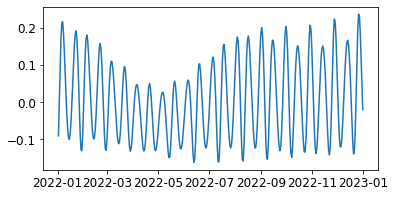

In [36]:
indA = np.where(flagA)[0][80]
tf = tfs.iloc[indA]
lat = tf.groundLat
lon = tf.groundLon
print('lat/lon: {}/{}'.format(lat, lon))
dt0 = dt.datetime(2000,1,1) + dt.timedelta(seconds=int((tf.startET + tf.endET)/2.0))
dt1 = dt0 + dt.timedelta(days=365)

# run
(dt_out,
 tide_e,
 tide_n,
 tide_u) = pysolid.calc_solid_earth_tides_point(lat, lon, dt0, dt1,
                                                step_sec=60 * 10,
                                                display=False,
                                                verbose=False)
# plot
flag = np.array([x.time() == dt.time(0, 30) for x in dt_out])
fig, ax = plt.subplots(figsize=[6, 3])
ax.plot(dt_out[flag], tide_u[flag])